# Segment Images from Tiziana's Radio-opacity Measurements

On July 23, 2020, Dr. Tiziana Di Luccio presented images from a X-ray measurements of PLLA samples with varying amounts of tungsten disulfide nanotubes (WSNTs). To assist with image-processing, I will try some segmentation techniques that might allow us to highlight the areas belonging to each sample.

In [19]:
import skimage.io
import skimage.filters

import matplotlib.pyplot as plt

from importlib import reload

reload(skimage.filters)

im_filepath = 'figs/xray_plla_1.jpg'
im = skimage.io.imread(im_filepath)

th_lo_list = [10, 20, 30, 40, 50]
th_hi_list = [30, 60, 90, 120, 150]

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


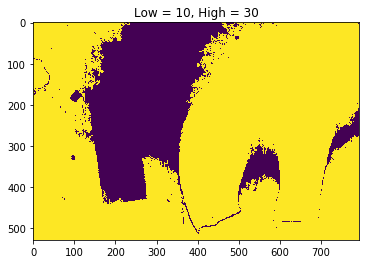

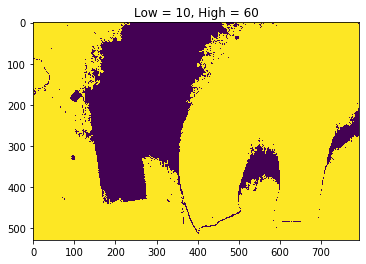

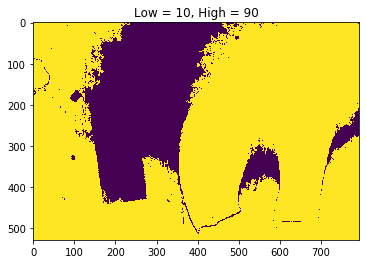

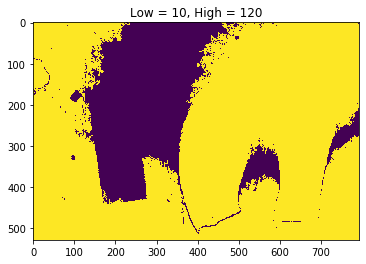

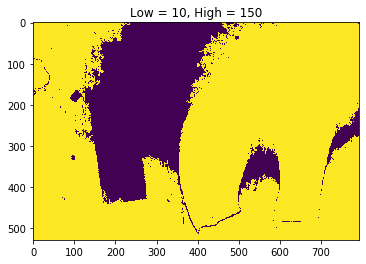

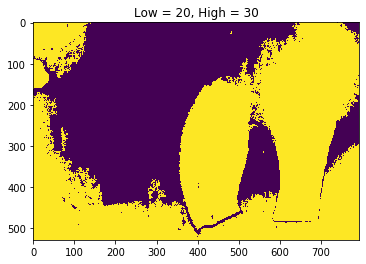

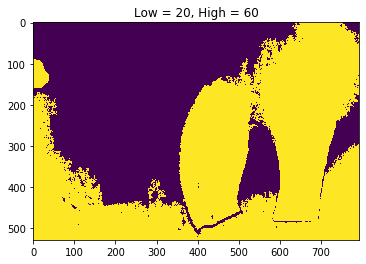

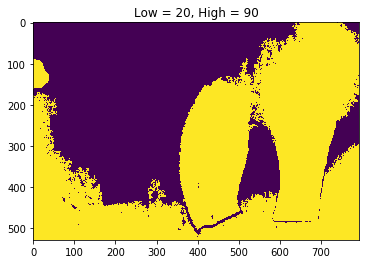

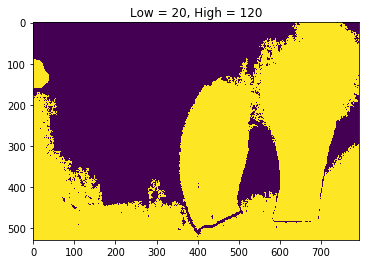

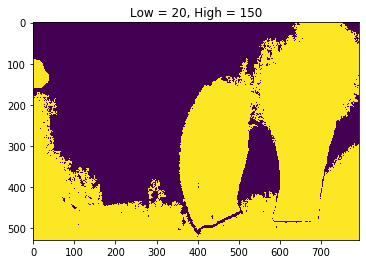

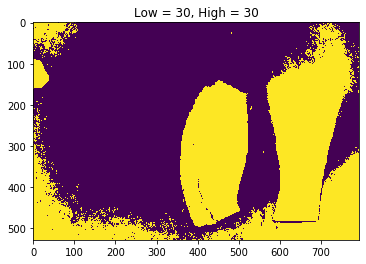

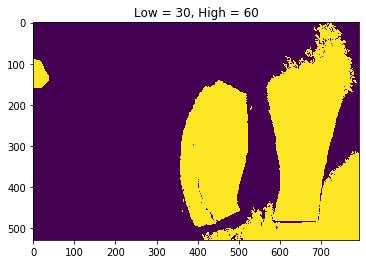

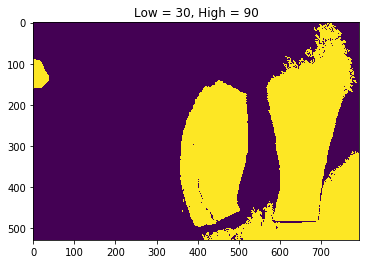

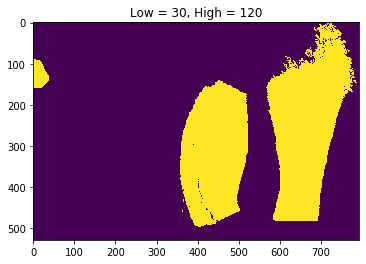

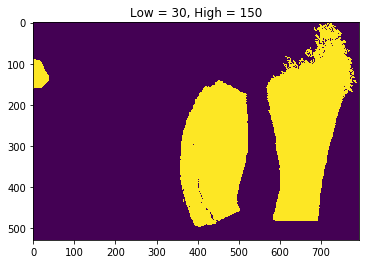

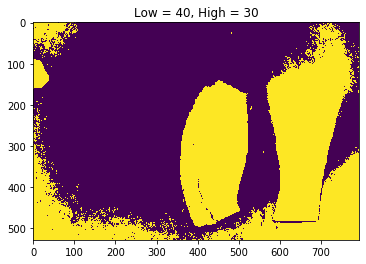

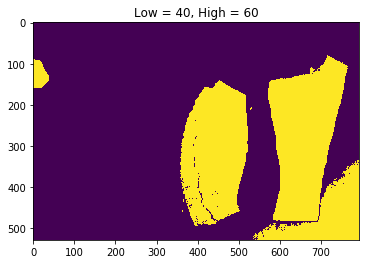

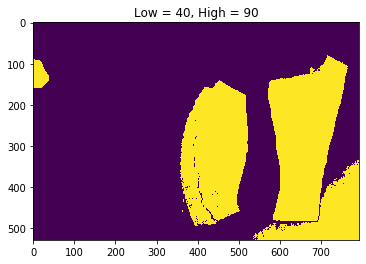

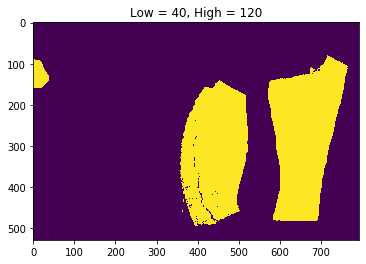

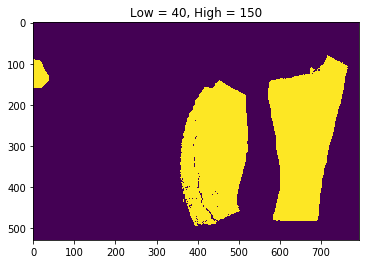

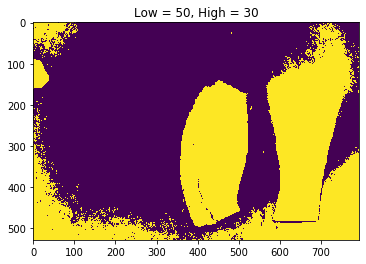

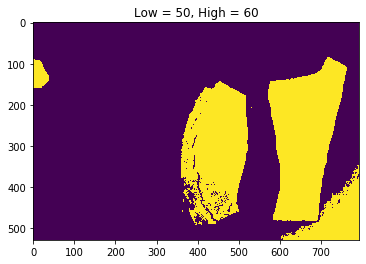

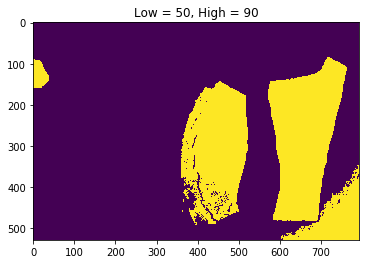

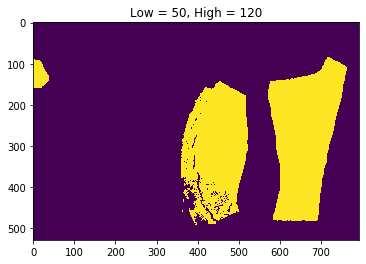

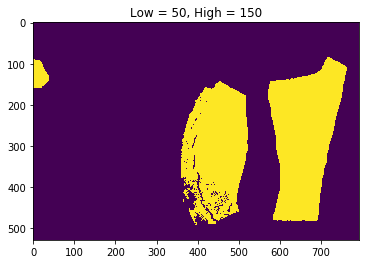

In [84]:
for th_lo in th_lo_list:
    for th_hi in th_hi_list:
        im_filt = 255*skimage.filters.apply_hysteresis_threshold(diff, th_lo, th_hi).astype('uint8')
        plt.figure()
        plt.imshow(im_filt)
        plt.title('Low = {0:d}, High = {1:d}'.format(th_lo, th_hi))

In [21]:
low_sigma_list = [0.1, 0.3, 0.5, 1, 3, 5]
high_sigma_list = [1, 3, 5, 10, 20, 40, 100]
for low_sigma in low_sigma_list:
    for high_sigma in high_sigma_list:
        im_filt = 255*skimage.filters.difference_of_gaussians(im, low_sigma, high_sigma).astype('uint8')
        plt.figure()
        plt.imshow(im_filt)
        plt.title('Low sigma = {0:.3f}, High Sigma = {0:.3f}'.format(low_sigma, high_sigma))

AttributeError: module 'skimage.filters' has no attribute 'difference_of_gaussians'

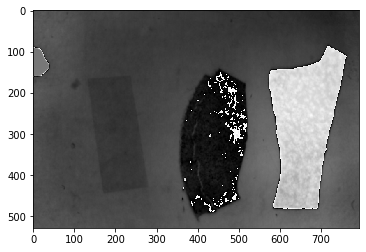

In [40]:
import cv2
import numpy as np


# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(im,(5,5),0)
high_sigma = cv2.GaussianBlur(im,(1111,1111),0)
 
# Calculate the DoG by subtracting
dog = np.abs(low_sigma - high_sigma).astype('uint8')

plt.figure()
plt.imshow(dog)
# plt.title('Low sigma = {0:.3f}, High Sigma = {0:.3f}'.format(low_sigma, high_sigma))

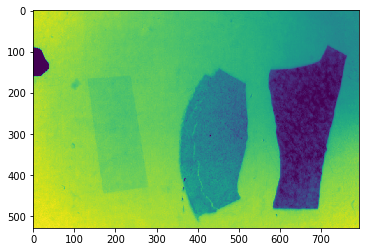

In [81]:
import skimage.morphology
import skimage.color

selem = skimage.morphology.disk(500)
im_med = skimage.filters.rank.median(skimage.color.rgb2gray(im), selem=selem)

bw = 255*skimage.color.rgb2gray(im)
diff = np.abs(im_med - bw).astype('uint8')

plt.figure()
plt.imshow(bw)

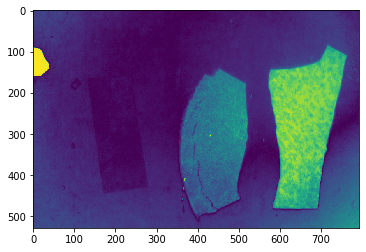

In [82]:
plt.figure()
plt.imshow(diff)

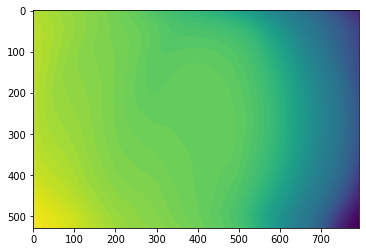

In [83]:
plt.figure()
plt.imshow(im_med)

## Final Product

Text(0.5, 1.0, 'Low = 40, High = 120')

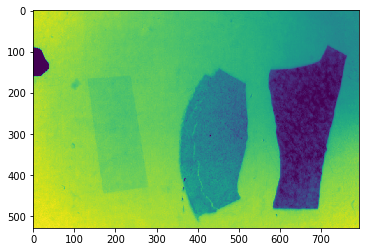

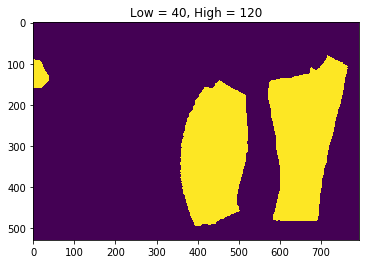

In [89]:
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.color

import matplotlib.pyplot as plt

im_filepath = 'figs/xray_plla_1.jpg'
im = skimage.io.imread(im_filepath)
selem_big = skimage.morphology.disk(500)
selem_small = skimage.morphology.disk(5)
th_lo = 40
th_hi = 120
min_size = 150

im_med = skimage.filters.rank.median(skimage.color.rgb2gray(im), selem=selem_big)
bw = 255*skimage.color.rgb2gray(im)
diff = np.abs(im_med - bw).astype('uint8')

plt.figure()
plt.imshow(bw)

im_filt = 255*skimage.filters.apply_hysteresis_threshold(diff, th_lo, th_hi).astype('uint8')
im_filt = skimage.morphology.remove_small_objects(im_filt.astype(bool),
                                                    min_size=min_size)
im_filt = skimage.morphology.binary_closing(im_filt, selem=selem_small)
plt.figure()
plt.imshow(im_filt)
plt.title('Low = {0:d}, High = {1:d}'.format(th_lo, th_hi))

Gets the dark objects, but cannot detect the lighter PLLA.